<a href="https://colab.research.google.com/github/golammostafa13/hate_speech_detection/blob/main/English_and_Bangla_Hate_Speech_5_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from keras.preprocessing.sequence import pad_sequences
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import string as st
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

2022-04-23 05:56:42.146742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 05:56:42.146870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mostafa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Preprocessing

In [ ]:
import pandas as pd
file = 'english/FinalBalancedDataset.csv'
data = pd.read_csv(file, encoding='utf-8')

In [ ]:
data.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

<AxesSubplot:xlabel='class', ylabel='count'>

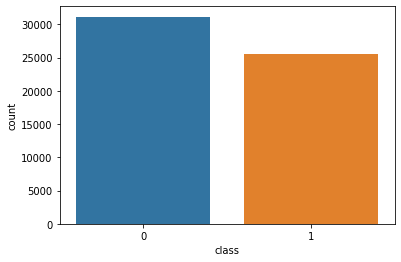

In [ ]:
import seaborn as sns
sns.countplot('class',data=data)

In [ ]:
import re
import nltk
nltk.download('wordnet')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

stopword=set(stopwords.words('english'))
new_word = ['amp']
stopword = stopword.union(new_word)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/mostafa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mostafa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def clean_text(text):
    text = str(text).lower()
    # text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text = " ".join(text)
    text = [word for word in text.split(' ') if len(word)>2]
    text = " ".join(text)
    return text
    # return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",text).split())

In [ ]:
data['tweet']=data['tweet'].apply(clean_text)

In [ ]:
data.head(5)

,Toxicity,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit use caus offer wheelchair va...
2,0,bihday majesti
3,0,model love take time
4,0,factsguid societi motiv


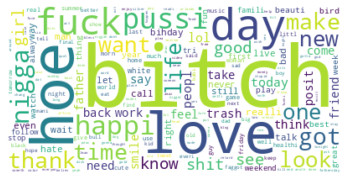

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

df = data

#Checking the Data

df.head()

#Creating the text variable

text2 = " ".join(tweet for tweet in df.tweet)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()


In [ ]:
path = 'english/hatePreprocessed.csv'

with open(path, 'w', encoding='utf-8') as f:
    data.to_csv(f)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['Toxicity'],random_state = 0,test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39652,), (9914,), (39652,), (9914,))

# ML models

In [ ]:
X, y = data.tweet.fillna(' '), data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size = 0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39721,), (17024,), (39721,), (17024,))

In [ ]:
# x = v.fit_transform(data['t'].values.astype('U'))
Tfidf_vect = TfidfVectorizer(max_features=None)
Tfidf_vect.fit(X)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(Train_X_Tfidf,y_train)
from sklearn.metrics import accuracy_score

predictions_train_NB = model.predict(Train_X_Tfidf)
predictions_NB = model.predict(Test_X_Tfidf)
print("Naive Bayes Training Accuracy Score -> ",accuracy_score(predictions_train_NB, y_train)*100)
print("Naive Bayes Test Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Training Accuracy Score ->  93.02887641298054
Naive Bayes Test Accuracy Score ->  88.68068609022556


In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)
pred_y_train = SVM.predict(Train_X_Tfidf)
pred_y = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("SVM Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

SVM Train Accuracy Score ->  96.30673950806879
SVM Test Accuracy Score ->  93.51503759398496


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(Train_X_Tfidf,y_train)
pred_y_train = RF.predict(Train_X_Tfidf)
pred_y = RF.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

Train Accuracy Score ->  99.85398152110973
Test Accuracy Score ->  92.60455827067669


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(Train_X_Tfidf,y_train)

pred_y_train = clf.predict(Train_X_Tfidf)
pred_y = clf.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

Train Accuracy Score ->  99.85398152110973
Test Accuracy Score ->  92.30498120300751


# Deep Learning Models

# Train-Test Split, Tokenizing, Padding

In [ ]:

data.tweet=data.tweet.astype(str)
X = data.tweet
y = data['Toxicity']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size = 0.2)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

MAX_SEQUENCE_LENGTH = 60

from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(X_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Vocabulary Size : 33196
Training X Shape: (45396, 60)
Testing X Shape: (11349, 60)


In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
print(y_train.shape, y_test.shape)

(45396, 1) (11349, 1)


In [ ]:
# Define per-fold score containers
import numpy as np
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape, targets.shape

((56745, 60), (56745, 1))

# Attention Layer

In [ ]:
from keras.layers import Layer
from keras import backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

# Word2vec and 5-fold cross validation

In [ ]:
inputs, targets

(array([[    0,     0,     0, ...,   392,   493,   661],
        [    0,     0,     0, ...,   153,  2072,    48],
        [    0,     0,     0, ...,     1,   116,    13],
        ...,
        [    0,     0,     0, ..., 14245,    87,  1286],
        [    0,     0,     0, ...,   984,     5,   750],
        [    0,     0,     0, ...,  2980,   768,     5]], dtype=int32),
 array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]))

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))
print(Word2vec_train_data[5])
EMBEDDING_DIM = 100
from gensim.models import Word2Vec
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=EMBEDDING_DIM,
                 workers=3,
                 min_count=4)

['best', 'essentialoil', 'anxieti', 'healthi', 'peac', 'altwaystoh']


/home/mostafa/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (33196, 100)


# HATE DETECT W2V

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    model_path = "TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = "TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
            
    #save model
    model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
620/620 [==============================] - 543s 831ms/step - loss: 0.1975 - accuracy: 0.9121
Epoch 2/10
620/620 [==============================] - 556s 896ms/step - loss: 0.1554 - accuracy: 0.9337
Epoch 3/10
620/620 [==============================] - 581s 937ms/step - loss: 0.1502 - accuracy: 0.9360
Epoch 4/10
620/620 [==============================] - 580s 935ms/step - loss: 0.1486 - accuracy: 0.9371
Epoch 5/10
620/620 [==============================] - 582s 939ms/step - loss: 0.1474 - accuracy: 0.9375
Epoch 6/10
620/620 [==============================] - 581s 936ms/step - loss: 0.1427 - accuracy: 0.9393
Epoch 7/10
620/620 [==============================] - 582s 938ms/step - loss: 0.1407 - accuracy: 0.9400
Epoch 8/10
620/620 [==============================] - 580s 935ms/step - loss: 0.1398 - accuracy: 0.9408
Epoch 9/10
620/620 [==============================] - 580s 936ms/step -

2022-04-18 22:54:57.059696: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: TwitterHateModels_word2vec/1model/assets


Score for fold 1: loss of 0.12517638504505157; accuracy of 94.73471641540527%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
620/620 [==============================] - 603s 950ms/step - loss: 0.1793 - accuracy: 0.9187
Epoch 2/10
620/620 [==============================] - 592s 956ms/step - loss: 0.1508 - accuracy: 0.9356
Epoch 3/10
620/620 [==============================] - 584s 941ms/step - loss: 0.1442 - accuracy: 0.9384
Epoch 4/10
620/620 [==============================] - 585s 944ms/step - loss: 0.1433 - accuracy: 0.9399
Epoch 5/10
620/620 [==============================] - 621s 1s/step - loss: 0.1399 - accuracy: 0.9415
Epoch 6/10
620/620 [==============================] - 638s 1s/step - loss: 0.1382 - accuracy: 0.9411
Epoch 7/10
620/620 [==============================] - 692s 1s/step - loss: 0.1380 - accuracy: 0.9415
Epoch 8/10
620/620 [==============================] - 626s 1s/step - loss: 0.1345 - accuracy: 0.9444
Epoch

INFO:tensorflow:Assets written to: TwitterHateModels_word2vec/2model/assets


Score for fold 2: loss of 0.13567915558815002; accuracy of 94.65348720550537%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
620/620 [==============================] - 658s 1s/step - loss: 0.1795 - accuracy: 0.9210
Epoch 2/10
620/620 [==============================] - 637s 1s/step - loss: 0.1524 - accuracy: 0.9347
Epoch 3/10
620/620 [==============================] - 598s 963ms/step - loss: 0.1463 - accuracy: 0.9372
Epoch 4/10
620/620 [==============================] - 624s 1s/step - loss: 0.1443 - accuracy: 0.9387
Epoch 5/10
620/620 [==============================] - 646s 1s/step - loss: 0.1410 - accuracy: 0.9394
Epoch 6/10
620/620 [==============================] - 574s 926ms/step - loss: 0.1384 - accuracy: 0.9414
Epoch 7/10
620/620 [==============================] - 626s 1s/step - loss: 0.1374 - accuracy: 0.9425
Epoch 8/10
620/620 [==============================] - 633s 1s/step - loss: 0.1344 - accuracy: 0.9426
Epoch 9/10


INFO:tensorflow:Assets written to: TwitterHateModels_word2vec/3model/assets


Score for fold 3: loss of 0.12342187762260437; accuracy of 95.10743618011475%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
620/620 [==============================] - 531s 829ms/step - loss: 0.1861 - accuracy: 0.9147
Epoch 2/10
620/620 [==============================] - 514s 829ms/step - loss: 0.1517 - accuracy: 0.9353
Epoch 3/10
620/620 [==============================] - 511s 825ms/step - loss: 0.1455 - accuracy: 0.9380
Epoch 4/10
620/620 [==============================] - 595s 960ms/step - loss: 0.1431 - accuracy: 0.9394
Epoch 5/10
620/620 [==============================] - 1109s 2s/step - loss: 0.1408 - accuracy: 0.9414
Epoch 6/10
620/620 [==============================] - 977s 2s/step - loss: 0.1392 - accuracy: 0.9409
Epoch 7/10
620/620 [==============================] - 1010s 2s/step - loss: 0.1374 - accuracy: 0.9428
Epoch 8/10
620/620 [==============================] - 1219s 2s/step - loss: 0.1348 - accuracy: 0.9435
Ep

INFO:tensorflow:Assets written to: TwitterHateModels_word2vec/4model/assets


Score for fold 4: loss of 0.12245946377515793; accuracy of 94.88550424575806%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
620/620 [==============================] - 687s 1s/step - loss: 0.1769 - accuracy: 0.9223
Epoch 2/10
620/620 [==============================] - 631s 1s/step - loss: 0.1462 - accuracy: 0.9373
Epoch 3/10
620/620 [==============================] - 519s 837ms/step - loss: 0.1433 - accuracy: 0.9398
Epoch 4/10
620/620 [==============================] - 518s 836ms/step - loss: 0.1405 - accuracy: 0.9402
Epoch 5/10
620/620 [==============================] - 518s 836ms/step - loss: 0.1383 - accuracy: 0.9416
Epoch 6/10
620/620 [==============================] - 584s 943ms/step - loss: 0.1358 - accuracy: 0.9422
Epoch 7/10
620/620 [==============================] - 589s 950ms/step - loss: 0.1341 - accuracy: 0.9448
Epoch 8/10
620/620 [==============================] - 587s 947ms/step - loss: 0.1322 - accuracy: 0.9444

INFO:tensorflow:Assets written to: TwitterHateModels_word2vec/5model/assets


Score for fold 5: loss of 0.13185422122478485; accuracy of 94.60304379463196%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.12517638504505157 - Accuracy: 94.73471641540527%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.13567915558815002 - Accuracy: 94.65348720550537%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.12342187762260437 - Accuracy: 95.10743618011475%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.12245946377515793 - Accuracy: 94.88550424575806%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.13185422122478485 - Accuracy: 94.60304379463196%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.79683756828

# BI-GRU W2V

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
#     # convert the history.history dict to a pandas DataFrame:     
#     hist_df = pd.DataFrame(history.history) 

#     # save to json:  
#     hist_json_file = "TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
    #save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2022-04-21 21:39:52.254256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 21:39:52.254321: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 21:39:52.254377: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mostafa): /proc/driver/nvidia/version does not exist
2022-04-21 21:39:52.276311: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 303s 409ms/step - loss: 0.2782 - accuracy: 0.8852
Epoch 2/5
710/710 [==============================] - 292s 411ms/step - loss: 0.2438 - accuracy: 0.8982
Epoch 3/5
710/710 [==============================] - 290s 408ms/step - loss: 0.2339 - accuracy: 0.9032
Epoch 4/5
710/710 [==============================] - 291s 410ms/step - loss: 0.2269 - accuracy: 0.9065
Epoch 5/5
710/710 [==============================] - 289s 406ms/step - loss: 0.2219 - accuracy: 0.9088
Score for fold 1: loss of 0.20849475264549255; accuracy of 91.3331687450409%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 294s 403ms/step - loss: 0.2651 - accuracy: 0.8890
Epoch 2/5
710/710 [==============================] - 286s 403ms/step - loss: 0.2308 - accuracy: 0.9040
Epoch 3/

# LSTM W2V

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
#     # convert the history.history dict to a pandas DataFrame:     
#     hist_df = pd.DataFrame(history.history) 

#     # save to json:  
#     hist_json_file = "TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
    #save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 196s 269ms/step - loss: 0.6511 - accuracy: 0.5992
Epoch 2/5
710/710 [==============================] - 193s 271ms/step - loss: 0.6483 - accuracy: 0.6003
Epoch 3/5
710/710 [==============================] - 185s 260ms/step - loss: 0.6472 - accuracy: 0.6010
Epoch 4/5
710/710 [==============================] - 171s 241ms/step - loss: 0.6464 - accuracy: 0.6013
Epoch 5/5
710/710 [==============================] - 173s 243ms/step - loss: 0.6458 - accuracy: 0.6017
Score for fold 1: loss of 0.6445356607437134; accuracy of 60.6897234916687%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 176s 243ms/step - loss: 0.6495 - accuracy: 0.6015
Epoch 2/5
710/710 [==============================] - 179s 252ms/step - loss: 0.6466 - accuracy: 0.6029
Epoch 3/5

# Fasttext and 5-fold cross validatioin

In [ ]:
fastText_train_data = list(map(lambda x: x.split(), X_train))
print(fastText_train_data[5])
EMBEDDING_DIM = 100
from gensim.models import FastText
fastText_model = FastText(fastText_train_data,
                 vector_size=EMBEDDING_DIM,
                 workers=3,
                 min_count=4)

['best', 'essentialoil', 'anxieti', 'healthi', 'peac', 'altwaystoh']


/home/mostafa/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, token in tokenizer.word_index.items():
    if fastText_model.wv.__contains__(word):
        embedding_matrix[token] = fastText_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (33196, 100)


# HATE DETECT FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
620/620 [==============================] - 584s 911ms/step - loss: 0.2248 - accuracy: 0.8974
Epoch 2/10
620/620 [==============================] - 506s 817ms/step - loss: 0.1759 - accuracy: 0.9222
Epoch 3/10
620/620 [==============================] - 507s 818ms/step - loss: 0.1664 - accuracy: 0.9273
Epoch 4/10
620/620 [==============================] - 510s 822ms/step - loss: 0.1605 - accuracy: 0.9301
Epoch 5/10
620/620 [==============================] - 660s 1s/step - loss: 0.1574 - accuracy: 0.9313
Epoch 6/10
620/620 [==============================] - 513s 827ms/step - loss: 0.1549 - accuracy: 0.9331
Epoch 7/10
620/620 [==============================] - 509s 820ms/step - loss: 0.1512 - accuracy: 0.9342
Epoch 8/10
620/620 [==============================] - 509s 821ms/step - loss: 0.1504 - accuracy: 0.9349
Epoch 9/10
620/620 [==============================] - 507s 817ms/step - lo

# BI-GRU FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 336s 364ms/step - loss: 0.3050 - accuracy: 0.8738
Epoch 2/5
710/710 [==============================] - 242s 341ms/step - loss: 0.2612 - accuracy: 0.8908
Epoch 3/5
710/710 [==============================] - 243s 342ms/step - loss: 0.2523 - accuracy: 0.8950
Epoch 4/5
710/710 [==============================] - 243s 342ms/step - loss: 0.2463 - accuracy: 0.8963
Epoch 5/5
710/710 [==============================] - 247s 349ms/step - loss: 0.2415 - accuracy: 0.8995
Score for fold 1: loss of 0.2259172648191452; accuracy of 90.44882655143738%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 296s 389ms/step - loss: 0.2926 - accuracy: 0.8785
Epoch 2/5
710/710 [==============================] - 265s 373ms/step - loss: 0.2535 - accuracy: 0.8942
Epoch 3/

# LSTM FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(units=128, dropout=0.25, recurrent_dropout=0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2022-04-22 14:27:17.512482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 14:27:17.512608: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 14:27:17.512693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mostafa): /proc/driver/nvidia/version does not exist
2022-04-22 14:27:17.523294: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 140s 189ms/step - loss: 0.2832 - accuracy: 0.8812
Epoch 2/5
710/710 [==============================] - 129s 181ms/step - loss: 0.2480 - accuracy: 0.8959
Epoch 3/5
710/710 [==============================] - 128s 180ms/step - loss: 0.2390 - accuracy: 0.8993
Epoch 4/5
710/710 [==============================] - 128s 181ms/step - loss: 0.2339 - accuracy: 0.9023
Epoch 5/5
710/710 [==============================] - 128s 181ms/step - loss: 0.2306 - accuracy: 0.9033
Score for fold 1: loss of 0.22522643208503723; accuracy of 90.65997004508972%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 132s 180ms/step - loss: 0.2684 - accuracy: 0.8885
Epoch 2/5
710/710 [==============================] - 129s 181ms/step - loss: 0.2401 - accuracy: 0.8988
Epoch 3

In [ ]:
print("hello")

hello


# Glove and 5-fold cross validation

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 33196


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/home/mostafa/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/tmp/ipykernel_2383/19554426.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, token in tokenizer.word_index.items():
    if model.__contains__(word):
        embedding_matrix[token] = model.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (33196, 100)


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33096999,  0.082649  ,  0.66940999, ...,  0.14552   ,
         0.096472  , -0.28279001],
       [-0.1644    , -0.27706   , -0.33697   , ...,  0.17838   ,
         0.67962003, -0.13873   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48414001, -0.094258  ,  0.0594    , ..., -0.25029999,
         0.13060001, -0.27077001],
       [ 0.30818   ,  0.56160003,  1.10650003, ..., -0.54808998,
        -0.044094  ,  0.79635   ]])

# HATE DETECT GLOVE

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation

fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2022-04-23 06:02:31.969968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-23 06:02:31.986863: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-23 06:02:31.997544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mostafa): /proc/driver/nvidia/version does not exist
2022-04-23 06:02:32.112148: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 840s 1s/step - loss: 0.3217 - accuracy: 0.8644
Epoch 2/5
710/710 [==============================] - 933s 1s/step - loss: 0.2760 - accuracy: 0.8856
Epoch 3/5
710/710 [==============================] - 625s 879ms/step - loss: 0.2593 - accuracy: 0.8944
Epoch 4/5
710/710 [==============================] - 625s 880ms/step - loss: 0.2490 - accuracy: 0.8970
Epoch 5/5
710/710 [==============================] - 717s 1s/step - loss: 0.2384 - accuracy: 0.9019
Score for fold 1: loss of 0.2301158607006073; accuracy of 90.64234495162964%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 718s 938ms/step - loss: 0.3068 - accuracy: 0.8731
Epoch 2/5
710/710 [==============================] - 661s 931ms/step - loss: 0.2606 - accuracy: 0.8935
Epoch 3/5
710/710

# BI-GRU GLOVE

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 210s 285ms/step - loss: 0.3306 - accuracy: 0.8601
Epoch 2/5
710/710 [==============================] - 196s 276ms/step - loss: 0.2792 - accuracy: 0.8832
Epoch 3/5
710/710 [==============================] - 196s 276ms/step - loss: 0.2614 - accuracy: 0.8914
Epoch 4/5
710/710 [==============================] - 196s 276ms/step - loss: 0.2506 - accuracy: 0.8948
Epoch 5/5
710/710 [==============================] - 222s 312ms/step - loss: 0.2411 - accuracy: 0.8994
Score for fold 1: loss of 0.2293679565191269; accuracy of 90.55423140525818%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 226s 307ms/step - loss: 0.3065 - accuracy: 0.8726
Epoch 2/5
710/710 [==============================] - 200s 281ms/step - loss: 0.2630 - accuracy: 0.8905
Epoch 3/

# LSTM GLOVE

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(units=128, dropout=0.25, recurrent_dropout=0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2022-04-22 19:51:55.978282: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 19:51:55.978394: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 19:51:55.978466: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mostafa): /proc/driver/nvidia/version does not exist
2022-04-22 19:51:55.998998: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
710/710 [==============================] - 174s 237ms/step - loss: 0.3360 - accuracy: 0.8564
Epoch 2/5
710/710 [==============================] - 162s 227ms/step - loss: 0.2769 - accuracy: 0.8847
Epoch 3/5
710/710 [==============================] - 160s 225ms/step - loss: 0.2606 - accuracy: 0.8914
Epoch 4/5
710/710 [==============================] - 180s 253ms/step - loss: 0.2482 - accuracy: 0.8960
Epoch 5/5
710/710 [==============================] - 165s 232ms/step - loss: 0.2405 - accuracy: 0.8993
Score for fold 1: loss of 0.21968962252140045; accuracy of 90.66877961158752%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
710/710 [==============================] - 160s 218ms/step - loss: 0.3120 - accuracy: 0.8653
Epoch 2/5
710/710 [==============================] - 160s 226ms/step - loss: 0.2619 - accuracy: 0.8914
Epoch 3

# BANGLA HATE SPEECH DETECTION

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

2022-04-20 16:42:31.048927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-20 16:42:31.049009: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
file = '../content/cleaned_data.csv'
data = pd.read_csv(file, encoding='utf-8')

In [ ]:
data.head()

,Unnamed: 0,sentence,hate,category,cleaned_text,sentenceLength,ReviewChars
0,0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,যত্তসব পাপন শালার ফাজলামী,4,30
1,1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,পাপন শালা রে রিমান্ডে নেওয়া দরকার,6,33
2,2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,20,107
3,3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,7,35
4,4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,তুই তো শালা গাজা খাইছচ তুর মার হেডায় খেলবে সাকিব,10,48


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['hate'],random_state = 0,test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24000,), (6000,), (24000,), (6000,))

In [ ]:
corpus=[]
words = 0;
j = 0
for i in data['cleaned_text'].values:
    corpus.append(str(i).split(" "))
    words += len(corpus[j])
    j += 1
print("Total words = ", words)
print("Total Sentances = ", len(corpus))

Total words =  509593
Total Sentances =  30000


# MACHINE LEARNING CLASSIFIERS

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=4000)
Tfidf_vect.fit(data['cleaned_text'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(Train_X_Tfidf,y_train)
from sklearn.metrics import accuracy_score

predictions_train_NB = model.predict(Train_X_Tfidf)
predictions_NB = model.predict(Test_X_Tfidf)
print("Naive Bayes Training Accuracy Score -> ",accuracy_score(predictions_train_NB, y_train)*100)
print("Naive Bayes Test Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Training Accuracy Score ->  74.75
Naive Bayes Test Accuracy Score ->  73.33333333333333


In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)
pred_y_train = SVM.predict(Train_X_Tfidf)
pred_y = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("SVM Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

SVM Train Accuracy Score ->  76.27916666666667
SVM Test Accuracy Score ->  75.38333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(Train_X_Tfidf,y_train)
pred_y_train = RF.predict(Train_X_Tfidf)
pred_y = RF.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

Train Accuracy Score ->  94.55
Test Accuracy Score ->  74.1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(Train_X_Tfidf,y_train)

pred_y_train = clf.predict(Train_X_Tfidf)
pred_y = clf.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

Train Accuracy Score ->  94.55
Test Accuracy Score ->  68.53333333333333


# WORD2VEC AND 5-FOLD CROSS VALIDATION

In [ ]:
import gensim
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
import os

# tokenize every words so that evey words maps to numaric value
tok = Tokenizer()
tok.fit_on_texts(data['cleaned_text'].values.astype('U'))
encd_rev = tok.texts_to_sequences(data['cleaned_text'].values.astype('U'))
# tok.word_index

# make all the input sentance same length with add padding
max_rev_len = 60 # max lenght of a sentance
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim = 100 # embedding dimension 
pad_rev= pad_sequences(encd_rev, maxlen=60, padding='post')

print("Size of vocabulary : ", vocab_size)
print("All sentances with same length ", pad_rev.shape)

# lebel encode the output label to categorical
Y = data['hate']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)


# test train split
X_train,X_test,y_train,y_test=train_test_split(pad_rev,encoded_Y,test_size=0.2, random_state = 0)

# make a dictionary. word as key and feature vector as value
embedding_index={}
f = open('../content/ban_hate_w2v.txt',encoding='utf-8')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:])
    embedding_index[word]=coefs
f.close()

# create a embeddings matrix with 200 dimenstion
EMBEDDING_DIM=100
embedding_matrix=np.zeros((vocab_size,EMBEDDING_DIM))
for word, i in tok.word_index.items():
    if i>vocab_size:
        continue
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

Size of vocabulary :  47752
All sentances with same length  (30000, 60)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 60), (6000, 60), (24000,), (6000,))

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(y_train.shape, y_test.shape)

(24000, 1) (6000, 1)


In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape, targets.shape

((30000, 60), (30000, 1))

# HATE DETECT W2V

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    model_path = "..content/w2v_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

#     save to json:  
    hist_json_file = "..content/w2v_history" + str(fold_no) + 'history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
            
#     save model
    model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2022-04-17 09:09:42.507043: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19100800 exceeds 10% of free system memory.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
375/375 [==============================] - 373s 962ms/step - loss: 0.4292 - accuracy: 0.8075
Epoch 2/10
375/375 [==============================] - 362s 963ms/step - loss: 0.3768 - accuracy: 0.8356
Epoch 3/10
375/375 [==============================] - 363s 969ms/step - loss: 0.3549 - accuracy: 0.8498
Epoch 4/10
375/375 [==============================] - 396s 1s/step - loss: 0.3392 - accuracy: 0.8543
Epoch 5/10
375/375 [==============================] - 314s 837ms/step - loss: 0.3311 - accuracy: 0.8589
Epoch 6/10
375/375 [==============================] - 314s 837ms/step - loss: 0.3218 - accuracy: 0.8617
Epoch 7/10
375/375 [==============================] - 339s 904ms/step - loss: 0.3119 - accuracy: 0.8678
Epoch 8/10
375/375 [==============================] - 411s 1s/step - loss: 0.3082 - accuracy: 0.8695
Epoch 9/10
375/375 [==============================] - 521s 1s/step - loss: 0.

# BI-GRU W2V

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "..content/w2v_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

#     save to json:  
#     hist_json_file = "..content/w2v_history" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
#     save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
375/375 [==============================] - 172s 384ms/step - loss: 0.4514 - accuracy: 0.7949
Epoch 2/5
375/375 [==============================] - 138s 367ms/step - loss: 0.3984 - accuracy: 0.8227
Epoch 3/5
375/375 [==============================] - 150s 400ms/step - loss: 0.3762 - accuracy: 0.8340
Epoch 4/5
375/375 [==============================] - 127s 337ms/step - loss: 0.3614 - accuracy: 0.8412
Epoch 5/5
375/375 [==============================] - 128s 341ms/step - loss: 0.3495 - accuracy: 0.8456
Score for fold 1: loss of 0.36566096544265747; accuracy of 85.25000214576721%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
375/375 [==============================] - 463s 309ms/step - loss: 0.4318 - accuracy: 0.8075
Epoch 2/5
375/375 [==============================] - 100s 267ms/step - loss: 0.3822 - accuracy: 0.8331
Epoch 3

# LSTM W2V

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(units=128, dropout=0.25, recurrent_dropout=0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "..content/w2v_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

#     save to json:  
#     hist_json_file = "..content/w2v_history" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
#     save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
375/375 [==============================] - 71s 172ms/step - loss: 0.5104 - accuracy: 0.7573
Epoch 2/5
375/375 [==============================] - 67s 178ms/step - loss: 0.4363 - accuracy: 0.8090
Epoch 3/5
375/375 [==============================] - 68s 180ms/step - loss: 0.4113 - accuracy: 0.8203
Epoch 4/5
375/375 [==============================] - 66s 177ms/step - loss: 0.3941 - accuracy: 0.8248
Epoch 5/5
375/375 [==============================] - 67s 178ms/step - loss: 0.3793 - accuracy: 0.8331
Score for fold 1: loss of 0.35536471009254456; accuracy of 84.21666622161865%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
375/375 [==============================] - 70s 178ms/step - loss: 0.6197 - accuracy: 0.6793
Epoch 2/5
375/375 [==============================] - 69s 184ms/step - loss: 0.6337 - accuracy: 0.6669
Epoch 3/5
375/

# GLOVE AND 5-FOLD CROSS VALIDATION

In [ ]:
import gensim
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
import os

# tokenize every words so that evey words maps to numaric value
tok = Tokenizer()
tok.fit_on_texts(data['cleaned_text'].values.astype('U'))
encd_rev = tok.texts_to_sequences(data['cleaned_text'].values.astype('U'))
# tok.word_index

# make all the input sentance same length with add padding
max_rev_len = 60 # max lenght of a sentance
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim = 100 # embedding dimension 
pad_rev= pad_sequences(encd_rev, maxlen=60, padding='post')

print("Size of vocabulary : ", vocab_size)
print("All sentances with same length ", pad_rev.shape)

# lebel encode the output label to categorical
Y = data['hate']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)


# test train split
X_train,X_test,y_train,y_test=train_test_split(pad_rev,encoded_Y,test_size=0.2, random_state = 0)

# make a dictionary. word as key and feature vector as value
embedding_index={}
f = open('../content/bn_glove.39M.100d.txt',encoding='utf-8')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:])
    embedding_index[word]=coefs
f.close()

# create a embeddings matrix with 200 dimenstion
EMBEDDING_DIM=100
embedding_matrix=np.zeros((vocab_size,EMBEDDING_DIM))
for word, i in tok.word_index.items():
    if i>vocab_size:
        continue
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

Size of vocabulary :  47752
All sentances with same length  (30000, 60)


# HATE DETECT GLOVE

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2022-04-17 14:27:34.568859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-17 14:27:34.568936: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-17 14:27:34.568996: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mostafa): /proc/driver/nvidia/version does not exist
2022-04-17 14:27:34.594014: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
375/375 [==============================] - 397s 1s/step - loss: 0.5390 - accuracy: 0.7303
Epoch 2/10
375/375 [==============================] - 389s 1s/step - loss: 0.4774 - accuracy: 0.7737
Epoch 3/10
375/375 [==============================] - 292s 779ms/step - loss: 0.4516 - accuracy: 0.7876
Epoch 4/10
375/375 [==============================] - 284s 756ms/step - loss: 0.4353 - accuracy: 0.7989
Epoch 5/10
375/375 [==============================] - 285s 759ms/step - loss: 0.4191 - accuracy: 0.8048
Epoch 6/10
375/375 [==============================] - 284s 757ms/step - loss: 0.4051 - accuracy: 0.8144
Epoch 7/10
375/375 [==============================] - 284s 758ms/step - loss: 0.3944 - accuracy: 0.8177
Epoch 8/10
375/375 [==============================] - 285s 760ms/step - loss: 0.3866 - accuracy: 0.8239
Epoch 9/10
375/375 [==============================] - 282s 751ms/step - loss:

# BI-GRU GLOVE

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
375/375 [==============================] - 115s 284ms/step - loss: 0.5299 - accuracy: 0.7329
Epoch 2/10
375/375 [==============================] - 105s 279ms/step - loss: 0.4838 - accuracy: 0.7668
Epoch 3/10
375/375 [==============================] - 107s 284ms/step - loss: 0.4622 - accuracy: 0.7823
Epoch 4/10
375/375 [==============================] - 106s 282ms/step - loss: 0.4503 - accuracy: 0.7879
Epoch 5/10
375/375 [==============================] - 106s 282ms/step - loss: 0.4319 - accuracy: 0.7963
Epoch 6/10
375/375 [==============================] - 107s 284ms/step - loss: 0.4232 - accuracy: 0.8044
Epoch 7/10
375/375 [==============================] - 107s 285ms/step - loss: 0.4115 - accuracy: 0.8125
Epoch 8/10
375/375 [==============================] - 107s 285ms/step - loss: 0.4049 - accuracy: 0.8140
Epoch 9/10
375/375 [==============================] - 109s 291ms/step -

# LSTM GLOVE

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    # model_path = "content_english/TwitterHateModels_word2vec/" + str(fold_no) + "model"
    
    # convert the history.history dict to a pandas DataFrame:     
    # hist_df = pd.DataFrame(history.history) 

    # save to json:  
    # hist_json_file = "content_english/TwitterHateHistory_word2vec/" + str(fold_no) + 'history.json' 
    # with open(hist_json_file, mode='w') as f:
    #     hist_df.to_json(f)
            
    #save model
    # model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
375/375 [==============================] - 102s 256ms/step - loss: 0.5716 - accuracy: 0.7113
Epoch 2/5
375/375 [==============================] - 90s 239ms/step - loss: 0.5289 - accuracy: 0.7412
Epoch 3/5
375/375 [==============================] - 91s 241ms/step - loss: 0.5139 - accuracy: 0.7513
Epoch 4/5
375/375 [==============================] - 90s 239ms/step - loss: 0.4953 - accuracy: 0.7638
Epoch 5/5
375/375 [==============================] - 88s 236ms/step - loss: 0.4830 - accuracy: 0.7711
Score for fold 1: loss of 0.46865135431289673; accuracy of 77.47945189476013%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
375/375 [==============================] - 94s 239ms/step - loss: 0.5713 - accuracy: 0.7091
Epoch 2/5
375/375 [==============================] - 89s 238ms/step - loss: 0.5197 - accuracy: 0.7469
Epoch 3/5
375

# FASTTEXT AND 5-FOLD CROSS VALIDATION

In [ ]:
data.to_csv('../content/train_ft.csv')

In [ ]:
import fasttext
model = fasttext.train_unsupervised('../content/train_ft.csv', model='cbow')
model.save_model("fasttext_bn_100.vec")

Read 0M words
Number of words:  13150
Number of labels: 0
Progress: 100.0% words/sec/thread:   39534 lr:  0.000000 avg.loss:  2.323040 ETA:   0h 0m 0s% words/sec/thread:   39534 lr: -0.000004 avg.loss:  2.323040 ETA:   0h 0m 0s


In [ ]:
model.words

['</s>',
 'না',
 'করে',
 'আর',
 'কি',
 'এই',
 'কে',
 'and',
 'TikTok',
 'একটা',
 'কথা',
 'ও',
 'যে',
 'জন্য',
 'তো',
 'আমার',
 'আমি',
 'তার',
 'থেকে',
 'এর',
 'আপনার',
 'ভালো',
 'সব',
 'কোন',
 'হয়',
 'সাথে',
 'কিছু',
 'করা',
 'অনেক',
 'হবে',
 'আপনি',
 'মনে',
 'মানুষ',
 'আছে',
 'করতে',
 'দিয়ে',
 'নিয়ে',
 'নাই',
 'বলে',
 'তুই',
 'এখন',
 'যদি',
 'আমাদের',
 'ভাই',
 'হয়ে',
 'তোর',
 'কিন্তু',
 'মত',
 'কেন',
 'বাচ্চা',
 'এক',
 'টা',
 'আমরা',
 'তাদের',
 'সে',
 'এবং',
 'তাহলে',
 'ভিডিও',
 'এ',
 'করার',
 'এটা',
 'তাই',
 'বড়',
 'কাছে',
 'বিচার',
 'সবাই',
 'চাই',
 'জুতা',
 'আবার',
 'দেশের',
 'তারা',
 'এমন',
 'কেউ',
 'খুব',
 'মতো',
 'টাকা',
 'ঠিক',
 'আল্লাহ',
 'ভাল',
 'খারাপ',
 'দেখে',
 'একজন',
 'আগে',
 'দিন',
 'তুমি',
 'পারে',
 'ছিল',
 'দরকার',
 'সেই',
 'তা',
 'দেওয়া',
 'স্যার',
 'হলে',
 'করছে',
 'নাকি',
 'এত',
 'যারা',
 'সময়',
 'আজ',
 'যায়',
 'কমেন্ট',
 'কাজ',
 'কোনো',
 'কুত্তার',
 'হচ্ছে',
 'কত',
 'বাংলাদেশ',
 'নেই',
 'উচিত',
 'আপনাকে',
 'মাগির',
 'পর',
 'গুলো',
 'তখন',
 'দিতে',
 'মানুষের',
 'দে

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, token in tok.word_index.items():
    if model.__contains__(word):
        embedding_matrix[token] = model.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (47752, 100)


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01350805,  0.40760002, -1.38908362, ..., -0.52245951,
        -0.88665086, -0.63685602],
       [-0.22113167,  0.45417839, -0.27309507, ...,  0.05569401,
        -0.26027063, -1.6534363 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# HATE DETECT FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
375/375 [==============================] - 331s 856ms/step - loss: 0.4031 - accuracy: 0.8219
Epoch 2/10
375/375 [==============================] - 322s 860ms/step - loss: 0.3502 - accuracy: 0.8485
Epoch 3/10
375/375 [==============================] - 346s 923ms/step - loss: 0.3357 - accuracy: 0.8606
Epoch 4/10
375/375 [==============================] - 330s 879ms/step - loss: 0.3242 - accuracy: 0.8658
Epoch 5/10
375/375 [==============================] - 318s 848ms/step - loss: 0.3128 - accuracy: 0.8690
Epoch 6/10
375/375 [==============================] - 355s 947ms/step - loss: 0.3054 - accuracy: 0.8731
Epoch 7/10
375/375 [==============================] - 324s 865ms/step - loss: 0.2982 - accuracy: 0.8771
Epoch 8/10
375/375 [==============================] - 395s 1s/step - loss: 0.2903 - accuracy: 0.8810
Epoch 9/10
375/375 [==============================] - 287s 766ms/step - lo

FileNotFoundError: [Errno 2] No such file or directory: '..content/fasttext_history/1history.json'

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    model_path = "../content/fasttext_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

#     save to json:  
    hist_json_file = "../content/fasttext_history/" + str(fold_no) + 'history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
            
#     save model
    model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
375/375 [==============================] - 648s 2s/step - loss: 0.3900 - accuracy: 0.8332
Epoch 2/10
375/375 [==============================] - 487s 1s/step - loss: 0.3324 - accuracy: 0.8601
Epoch 3/10
375/375 [==============================] - 291s 775ms/step - loss: 0.3169 - accuracy: 0.8692
Epoch 4/10
375/375 [==============================] - 321s 856ms/step - loss: 0.3033 - accuracy: 0.8746
Epoch 5/10
375/375 [==============================] - 358s 955ms/step - loss: 0.2921 - accuracy: 0.8787
Epoch 6/10
375/375 [==============================] - 324s 865ms/step - loss: 0.2820 - accuracy: 0.8823
Epoch 7/10
375/375 [==============================] - 350s 932ms/step - loss: 0.2745 - accuracy: 0.8886
Epoch 8/10
375/375 [==============================] - 310s 828ms/step - loss: 0.2663 - accuracy: 0.8895
Epoch 9/10
375/375 [==============================] - 314s 838ms/step - loss:

INFO:tensorflow:Assets written to: ../content/fasttext_models/2model/assets


Score for fold 2: loss of 0.3438962399959564; accuracy of 87.99999952316284%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
375/375 [==============================] - 301s 773ms/step - loss: 0.3856 - accuracy: 0.8317
Epoch 2/10
375/375 [==============================] - 290s 774ms/step - loss: 0.3316 - accuracy: 0.8603
Epoch 3/10
375/375 [==============================] - 290s 774ms/step - loss: 0.3116 - accuracy: 0.8689
Epoch 4/10
375/375 [==============================] - 293s 781ms/step - loss: 0.3018 - accuracy: 0.8732
Epoch 5/10
375/375 [==============================] - 296s 788ms/step - loss: 0.2910 - accuracy: 0.8808
Epoch 6/10
375/375 [==============================] - 311s 830ms/step - loss: 0.2810 - accuracy: 0.8834
Epoch 7/10
375/375 [==============================] - 326s 870ms/step - loss: 0.2695 - accuracy: 0.8875
Epoch 8/10
375/375 [==============================] - 330s 881ms/step - loss: 0.2614 - accuracy: 0

INFO:tensorflow:Assets written to: ../content/fasttext_models/3model/assets


Score for fold 3: loss of 0.3144559860229492; accuracy of 88.06666731834412%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
375/375 [==============================] - 340s 874ms/step - loss: 0.3832 - accuracy: 0.8331
Epoch 2/10
375/375 [==============================] - 327s 873ms/step - loss: 0.3284 - accuracy: 0.8631
Epoch 3/10
375/375 [==============================] - 327s 873ms/step - loss: 0.3105 - accuracy: 0.8729
Epoch 4/10
375/375 [==============================] - 323s 859ms/step - loss: 0.2994 - accuracy: 0.8791
Epoch 5/10
375/375 [==============================] - 320s 853ms/step - loss: 0.2872 - accuracy: 0.8820
Epoch 6/10
375/375 [==============================] - 354s 945ms/step - loss: 0.2779 - accuracy: 0.8857
Epoch 7/10
375/375 [==============================] - 289s 771ms/step - loss: 0.2690 - accuracy: 0.8892
Epoch 8/10
375/375 [==============================] - 288s 769ms/step - loss: 0.2598 - accuracy: 0

INFO:tensorflow:Assets written to: ../content/fasttext_models/4model/assets


Score for fold 4: loss of 0.32712557911872864; accuracy of 87.4666690826416%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
375/375 [==============================] - 306s 788ms/step - loss: 0.3923 - accuracy: 0.8305
Epoch 2/10
375/375 [==============================] - 320s 853ms/step - loss: 0.3314 - accuracy: 0.8611
Epoch 3/10
375/375 [==============================] - 322s 859ms/step - loss: 0.3140 - accuracy: 0.8690
Epoch 4/10
375/375 [==============================] - 322s 859ms/step - loss: 0.3038 - accuracy: 0.8756
Epoch 5/10
375/375 [==============================] - 323s 862ms/step - loss: 0.2933 - accuracy: 0.8793
Epoch 6/10
375/375 [==============================] - 325s 868ms/step - loss: 0.2822 - accuracy: 0.8853
Epoch 7/10
375/375 [==============================] - 331s 882ms/step - loss: 0.2748 - accuracy: 0.8872
Epoch 8/10
375/375 [==============================] - 322s 860ms/step - loss: 0.2662 - accuracy: 0

INFO:tensorflow:Assets written to: ../content/fasttext_models/5model/assets


Score for fold 5: loss of 0.33121421933174133; accuracy of 87.56666779518127%
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
375/375 [==============================] - 333s 860ms/step - loss: 0.3873 - accuracy: 0.8347
Epoch 2/10
375/375 [==============================] - 322s 859ms/step - loss: 0.3357 - accuracy: 0.8593
Epoch 3/10
375/375 [==============================] - 324s 864ms/step - loss: 0.3168 - accuracy: 0.8691
Epoch 4/10
375/375 [==============================] - 322s 859ms/step - loss: 0.3031 - accuracy: 0.8753
Epoch 5/10
375/375 [==============================] - 324s 863ms/step - loss: 0.2930 - accuracy: 0.8786
Epoch 6/10
375/375 [==============================] - 322s 860ms/step - loss: 0.2833 - accuracy: 0.8839
Epoch 7/10
375/375 [==============================] - 326s 870ms/step - loss: 0.2754 - accuracy: 0.8864
Epoch 8/10
375/375 [==============================] - 323s 861ms/step - loss: 0.2674 - accuracy: 

INFO:tensorflow:Assets written to: ../content/fasttext_models/6model/assets


Score for fold 6: loss of 0.3089353144168854; accuracy of 87.56666779518127%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.311845064163208 - Accuracy: 88.18333148956299%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.3438962399959564 - Accuracy: 87.99999952316284%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.3144559860229492 - Accuracy: 88.06666731834412%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.32712557911872864 - Accuracy: 87.4666690826416%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.33121421933174133 - Accuracy: 87.56666779518127%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.3089353144168854 - Accuracy: 87.56666779518

# BI-GRU ATT FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = attention()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "../content/fasttext_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
#     hist_df = pd.DataFrame(history.history) 

#     save to json:  
#     hist_json_file = "../content/fasttext_history/" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
#     save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
375/375 [==============================] - 171s 439ms/step - loss: 0.4046 - accuracy: 0.8205
Epoch 2/5
375/375 [==============================] - 147s 392ms/step - loss: 0.3557 - accuracy: 0.8492
Epoch 3/5
375/375 [==============================] - 131s 349ms/step - loss: 0.3388 - accuracy: 0.8594
Epoch 4/5
375/375 [==============================] - 147s 392ms/step - loss: 0.3241 - accuracy: 0.8660
Epoch 5/5
375/375 [==============================] - 125s 334ms/step - loss: 0.3171 - accuracy: 0.8669
Score for fold 1: loss of 0.31690821051597595; accuracy of 86.2833321094513%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
375/375 [==============================] - 126s 317ms/step - loss: 0.3890 - accuracy: 0.8317
Epoch 2/5
375/375 [==============================] - 119s 316ms/step - loss: 0.3423 - accuracy: 0.8554
Epoch 3/

# BI-GRU FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Bidirectional(GRU(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25))(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "../content/fasttext_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
#     hist_df = pd.DataFrame(history.history) 

#     save to json:  
#     hist_json_file = "../content/fasttext_history/" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
#     save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
375/375 [==============================] - 123s 313ms/step - loss: 0.4304 - accuracy: 0.8093
Epoch 2/5
375/375 [==============================] - 125s 334ms/step - loss: 0.3631 - accuracy: 0.8463
Epoch 3/5
375/375 [==============================] - 143s 381ms/step - loss: 0.3513 - accuracy: 0.8520
Epoch 4/5
375/375 [==============================] - 155s 412ms/step - loss: 0.3379 - accuracy: 0.8577
Epoch 5/5
375/375 [==============================] - 173s 461ms/step - loss: 0.3333 - accuracy: 0.8607
Score for fold 1: loss of 0.33590734004974365; accuracy of 85.72726249694824%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
375/375 [==============================] - 227s 582ms/step - loss: 0.4255 - accuracy: 0.8087
Epoch 2/5
375/375 [==============================] - 224s 598ms/step - loss: 0.3574 - accuracy: 0.8469
Epoch 3

# LSTM FT

In [ ]:
# Model configuration
from tensorflow.keras.layers import Dense , Flatten ,Embedding,Input,LSTM, Bidirectional, Dense, Dropout,GRU,SpatialDropout1D, Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

batch_size = 64
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          100,
                                          weights=[embedding_matrix],
                                          input_length=60,
                                          trainable=False)
    sequence_input = Input(shape=(60,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(units=128, return_sequences = True, dropout=0.25, recurrent_dropout=0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
#     model_path = "../content/fasttext_models/" + str(fold_no) + "model"
    
#     convert the history.history dict to a pandas DataFrame:     
#     hist_df = pd.DataFrame(history.history) 

#     save to json:  
#     hist_json_file = "../content/fasttext_history/" + str(fold_no) + 'history.json' 
#     with open(hist_json_file, mode='w') as f:
#         hist_df.to_json(f)
            
#     save model
#     model.save(model_path)
    
  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
  # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
375/375 [==============================] - 111s 267ms/step - loss: 0.4439 - accuracy: 0.8023
Epoch 2/5
375/375 [==============================] - 113s 300ms/step - loss: 0.3936 - accuracy: 0.8276
Epoch 3/5
375/375 [==============================] - 98s 262ms/step - loss: 0.3714 - accuracy: 0.8404
Epoch 4/5
375/375 [==============================] - 81s 215ms/step - loss: 0.3602 - accuracy: 0.8468
Epoch 5/5
375/375 [==============================] - 80s 213ms/step - loss: 0.3497 - accuracy: 0.8513
Score for fold 1: loss of 0.3370093107223511; accuracy of 85.92779040336609%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
375/375 [==============================] - 89s 227ms/step - loss: 0.4445 - accuracy: 0.7967
Epoch 2/5
375/375 [==============================] - 80s 213ms/step - loss: 0.3822 - accuracy: 0.8376
Epoch 3/5
375